<a href="https://colab.research.google.com/github/JoseTayllan/JoseTayllan-Analise-completa-de-Dados/blob/main/Analise_completa_de_Dados_MB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Documentação: Análise de Dados de Churn**

Este documento fornece uma visão detalhada sobre o código de análise de churn. O foco é explicar o propósito de cada etapa, incluindo os conceitos de ciência de dados aplicados, tratamento de dados e a lógica por trás de cada operação.


\

---

## **1. Importação de Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns







As bibliotecas importadas fornecem funcionalidades essenciais:

\
**Pandas:** Manipulação de tabelas de dados e suporte para operações como leitura, limpeza e agregação.

**NumPy:** Fornece suporte para cálculos numéricos rápidos, especialmente úteis para operações em arrays e funções matemáticas.


**SciPy (stats):** Permite realizar testes estatísticos, como o teste T utilizado no código.


**Matplotlib e Seaborn:** Criam gráficos para visualização de dados, com Seaborn facilitando a estilização e análise.


\

---

##**2. Carregamento de Dados**

In [ ]:
from google.colab import files
uploaded = files.upload()

# Carregar os arquivos CSV
services_df = pd.read_csv('churn_services.csv')
customers_df = pd.read_csv('churn_customers.csv')
contracts_df = pd.read_csv('churn_contracts.csv')

Saving churn_services.csv to churn_services.csv
Saving churn_customers.csv to churn_customers.csv
Saving churn_contracts.csv to churn_contracts.csv




###Função: pd.read_csv()

Os dados de três arquivos CSV são carregados em DataFrames:

***churn_services.csv:*** Contém informações sobre os serviços utilizados pelos clientes.

***churn_customers.csv:*** Inclui detalhes demográficos e dados do cliente.

***churn_contracts.csv:*** Contém informações contratuais, como custos e status de churn.





```
services_df = pd.read_csv('churn_services.csv')
customers_df = pd.read_csv('churn_customers.csv')
contracts_df = pd.read_csv('churn_contracts.csv')
```








\

---

##**3. Identificação de Valores Ausentes**

In [ ]:
# Identificar valores ausentes
print(services_df.isnull().sum())
print(customers_df.isnull().sum())
print(contracts_df.isnull().sum())

# Exemplo de tratamento
contracts_df['TotalCharges'] = pd.to_numeric(contracts_df['TotalCharges'], errors='coerce')
contracts_df['TotalCharges'].fillna(contracts_df['TotalCharges'].median(), inplace=True)

customerID          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-3-b4256327a3d8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  contracts_df['TotalCharges'].fillna(contracts_df['TotalCharges'].median(), inplace=True)




Método: .isnull().sum()

O código verifica quais colunas têm valores ausentes e a quantidade:



```
print(services_df.isnull().sum())
print(customers_df.isnull().sum())
print(contracts_df.isnull().sum())
```

Por quê? Valores ausentes podem causar erros em análises ou introduzir viés nos resultados. Identificá-los é o primeiro passo para decidir o tratamento.

\

---

##**4. Tratamento de Dados Faltantes**

Conversão para Numérico

A coluna TotalCharges é convertida de string para valores numéricos. Qualquer valor inválido é transformado em NaN:

```
contracts_df['TotalCharges'] = pd.to_numeric(contracts_df['TotalCharges'], errors='coerce')
```



Preenchimento de Valores Faltantes

Os valores ausentes em TotalCharges são substituídos pela mediana da coluna:

```
contracts_df['TotalCharges'].fillna(contracts_df['TotalCharges'].median(), inplace=True)
```



Por quê? A mediana é usada porque é menos sensível a valores extremos em comparação com a média, garantindo um preenchimento mais robusto.

\

---

##**5. Exploração de Dados**

In [ ]:
print(services_df.info())
print(customers_df.info())
print(contracts_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCiti



Estrutura dos Dados

O método .info() fornece informações sobre colunas, tipos de dados e valores não nulos:

```
print(services_df.info())
print(customers_df.info())
print(contracts_df.info())
```





In [ ]:
print(customers_df.describe())
print(contracts_df['MonthlyCharges'].mean())


       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
64.76169246059918


Estatísticas Resumidas

O método .describe() apresenta estatísticas como média, desvio padrão, mínimo e máximo para colunas numéricas:

```
print(customers_df.describe())
print(contracts_df['MonthlyCharges'].mean())
```



Por quê? Essas análises iniciais ajudam a entender a distribuição dos dados e a identificar possíveis anomalias.

\

---

##**6. Análise Estatística**

In [ ]:
churn_yes = contracts_df[contracts_df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = contracts_df[contracts_df['Churn'] == 'No']['MonthlyCharges']

# Teste T
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 16.536738015936308, P-value: 2.7066456068884154e-60




Teste T

O Teste T é usado para comparar as médias de duas populações. Neste caso:

churn_yes: Clientes que cancelaram (Churn == 'Yes').

churn_no: Clientes que não cancelaram (Churn == 'No').



```
churn_yes = contracts_df[contracts_df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = contracts_df[contracts_df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_value = stats.ttest_ind(churn_yes, churn_no)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
```



Resultado do p-value:

Se p-value < 0.05, há diferença estatisticamente significativa entre as médias.

Caso contrário, as diferenças podem ser atribuídas ao acaso.

\

---

##**7. Filtragem de Dados**

In [ ]:
high_charges_churn = contracts_df[(contracts_df['MonthlyCharges'] > 70) & (contracts_df['Churn'] == 'Yes')]
print(high_charges_churn)


      customerID  tenure        Contract PaperlessBilling  \
4     9237-HQITU       2  Month-to-month              Yes   
5     9305-CDSKC       8  Month-to-month              Yes   
8     7892-POOKP      28  Month-to-month              Yes   
13    0280-XJGEX      49  Month-to-month              Yes   
26    6467-CHFZW      47  Month-to-month              Yes   
...          ...     ...             ...              ...   
7010  0723-DRCLG       1  Month-to-month              Yes   
7018  1122-JWTJW       1  Month-to-month              Yes   
7032  6894-LFHLY       1  Month-to-month              Yes   
7034  0639-TSIQW      67  Month-to-month              Yes   
7041  8361-LTMKD       4  Month-to-month              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
4              Electronic check           70.70        151.65   Yes  
5              Electronic check           99.65        820.50   Yes  
8              Electronic check          104.80       304



Identificação de clientes com altos custos mensais (MonthlyCharges > 70) que cancelaram:

```
high_charges_churn = contracts_df[(contracts_df['MonthlyCharges'] > 70) & (contracts_df['Churn'] == 'Yes')]
print(high_charges_churn)
```



Por quê? Esse filtro identifica padrões de clientes com custos mais altos que podem estar mais propensos a cancelar.

\

---

##**8. Criação de Nova Coluna**

In [ ]:
contracts_df['AvgCostPerMonth'] = contracts_df['TotalCharges'] / contracts_df['tenure']




A coluna AvgCostPerMonth calcula o custo médio mensal do contrato:

```
contracts_df['AvgCostPerMonth'] = contracts_df['TotalCharges'] / contracts_df['tenure']
```



Por quê? Esta métrica é útil para comparar custos médios ao longo do tempo e identificar discrepâncias entre clientes.


\

---

##**9. Visualizações**

###**9.1. Distribuição de Tipos de Contrato**

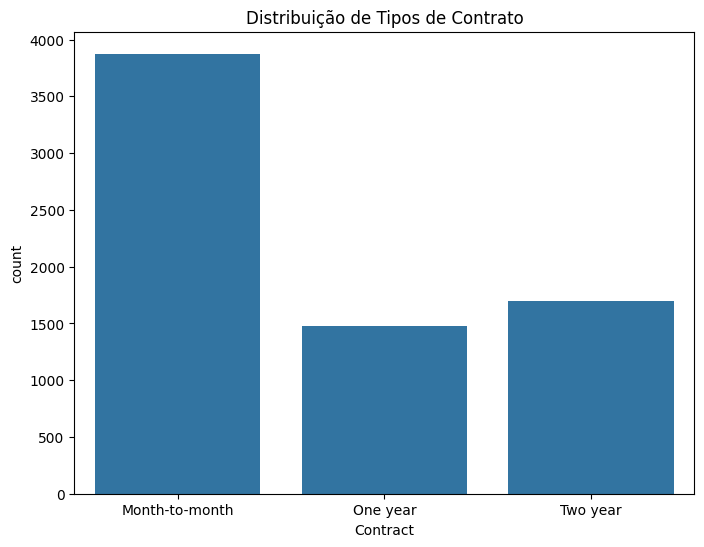

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=contracts_df)
plt.title('Distribuição de Tipos de Contrato')
plt.show()




Gráfico de barras mostrando o número de clientes por tipo de contrato:

```
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=contracts_df)
plt.title('Distribuição de Tipos de Contrato')
plt.show()
```



Insight esperado: Tipos de contrato podem influenciar a retenção de clientes.


\


###**9.2. Relação entre tenure e Churn**

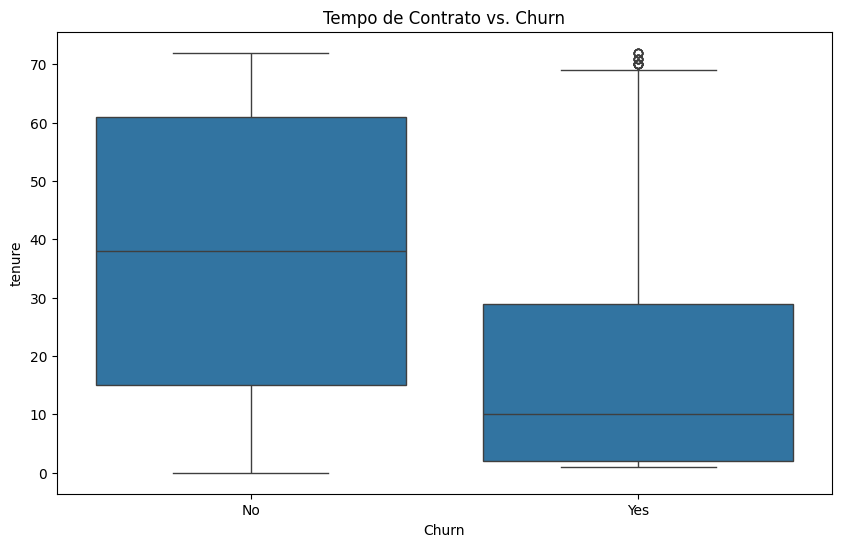

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=contracts_df)
plt.title('Tempo de Contrato vs. Churn')
plt.show()




Gráfico de caixa comparando o tempo de contrato (tenure) entre clientes que cancelaram e não cancelaram:

```
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=contracts_df)
plt.title('Tempo de Contrato vs. Churn')
plt.show()
```



Insight esperado: Clientes com contratos mais longos podem ter menor probabilidade de churn.

\


###**9.3. Matriz de Correlação**

In [ ]:
numeric_cols = contracts_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()


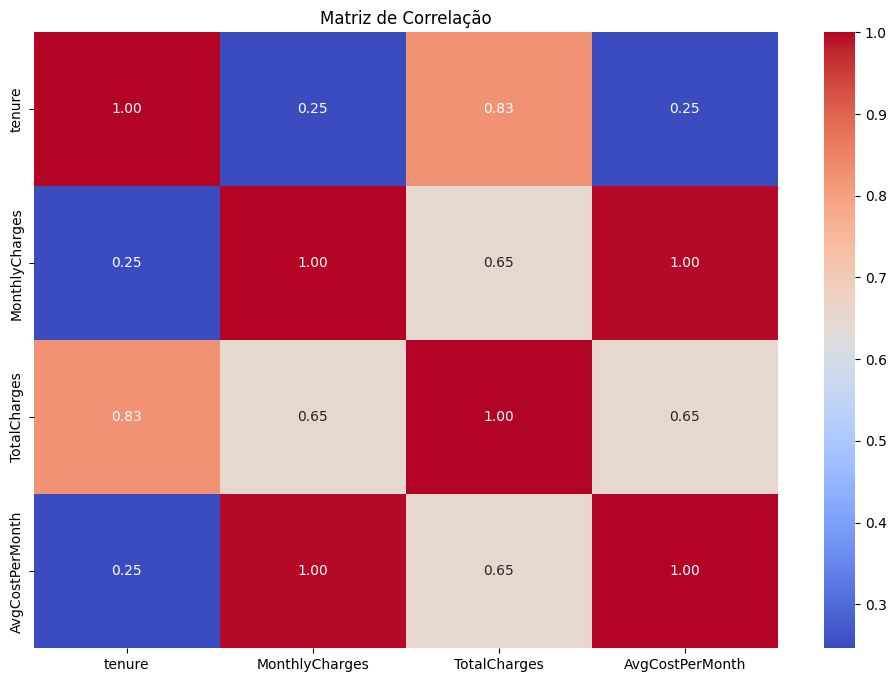

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()



Matriz de correlação para variáveis numéricas:

```
numeric_cols = contracts_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
```


```
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()
```



Por quê? A correlação mede a força e direção da relação entre variáveis, ajudando a identificar fatores associados ao churn.

\

---
##**10. Conclusões**

**Resumo dos Resultados**

**Valores Ausentes:** Tratados com sucesso.

**Teste T:** Avaliou a relação entre custos mensais e churn.

**Filtros:** Identificaram grupos de clientes mais propensos a churn.

**Visualizações:** Destacaram padrões importantes, como a influência de tipos de contrato e tempo de contrato.




#Melhoria e nova análise
* Melhoria para a Prova


###Análise de Métodos de Pagamento

* Avaliar se métodos de pagamento como Electronic check têm correlação com maior taxa de churn.

###Agrupamento por Método de Pagamento
Objetivo: Analisar a relação entre os métodos de pagamento e a taxa de churn.

Etapas:
Agrupamento: Agrupa os dados pelo PaymentMethod (método de pagamento) e Churn (status de cancelamento).
Porcentagem de Churn: Calcula a proporção de churn para cada método de pagamento.
Visualização Inicial: Exibe uma tabela com as porcentagens.

In [ ]:
# Agrupar os dados pelo método de pagamento e churn
payment_churn = contracts_df.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Calcular a porcentagem de churn por método de pagamento
payment_churn_percentage = (payment_churn.div(payment_churn.sum(axis=1), axis=0) * 100).round(2)

# Exibir os resultados
print("Porcentagem de churn por método de pagamento:")
print(payment_churn_percentage)


Porcentagem de churn por método de pagamento:
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


###Visualização
Objetivo: Criar um gráfico de barras empilhadas para visualizar o impacto dos métodos de pagamento no churn.

Configuração do Gráfico:
Tipo de Gráfico: Barras empilhadas (stacked=True).
Legendas e Títulos: Facilita a leitura e interpretação do gráfico.
Ajustes Estéticos: Rotação dos rótulos no eixo X, layout ajustado.

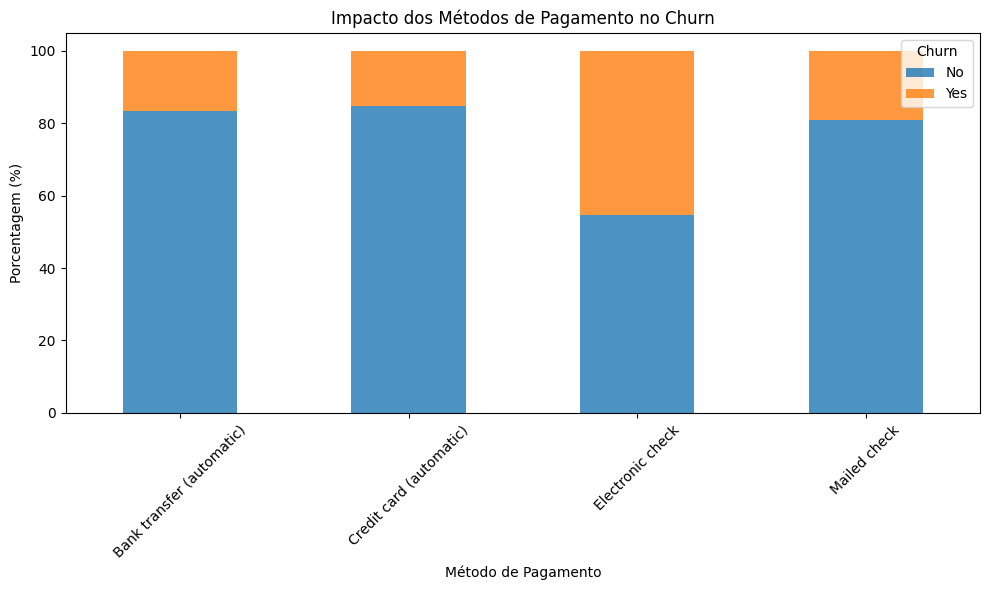

In [ ]:
# Criar o gráfico de barras empilhadas
payment_churn_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title('Impacto dos Métodos de Pagamento no Churn')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Método de Pagamento')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


Nome do Programa: Analise de Dados com Phython-MB2.

Desemvolvedor: José tayllan pinto Almeida.

Data de Criação: 04/12/2024 a 10/12/2024.

Disciplina: introdução a Python